# **Testing TensorFlow codes**

In [0]:
import tensorflow as tf
tf.reset_default_graph()

ss1 = tf.get_variable("ss1", [4, 2], initializer=tf.contrib.layers.xavier_initializer())
ss2 = tf.get_variable("ss2", [8, 2], initializer=tf.contrib.layers.xavier_initializer())
xx=tf.concat([ss1, ss2], 0)
init = tf.global_variables_initializer()
sess=tf.Session()
sess.run(init)
# print(sess.run(ss1))
# print(sess.run(ss2))
# #sess.close()
print(sess.run(xx))
# print(ss1.shape)
# print(ss2.shape)
print(xx.shape)
print(sess.run(tf.abs(xx)))

[[ 0.90794945 -0.8716583 ]
 [-0.8627472   0.36751604]
 [ 0.74882627 -0.5116308 ]
 [-0.70237255 -0.94668865]
 [ 0.6958653  -0.06405675]
 [-0.52873564  0.5370116 ]
 [ 0.4937713  -0.54452103]
 [-0.1881212   0.57568455]
 [-0.32219318  0.47455287]
 [ 0.6021931  -0.29107285]
 [-0.76737875  0.19504482]
 [ 0.24152005  0.00697255]]
(12, 2)
[[0.90794945 0.8716583 ]
 [0.8627472  0.36751604]
 [0.74882627 0.5116308 ]
 [0.70237255 0.94668865]
 [0.6958653  0.06405675]
 [0.52873564 0.5370116 ]
 [0.4937713  0.54452103]
 [0.1881212  0.57568455]
 [0.32219318 0.47455287]
 [0.6021931  0.29107285]
 [0.76737875 0.19504482]
 [0.24152005 0.00697255]]


# **CNN Code Training**

In [0]:
!pip install -U -q PyDrive

In [0]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
# Data with steering and acceleration
file1 = drive.CreateFile({'id': '1jnFMA3M2BsHvIKTItHSBJQ6j4O5eiuEy'})
file2 = drive.CreateFile({'id': '1AJ8sa_JvRKWcs8rXok5xaJjeeKhb24Ka'})
file3 = drive.CreateFile({'id': '1ty1b6Z7pxI2xAwX-UhXLyTpMI-8Z5F-9'})
file4 = drive.CreateFile({'id': '1F_DBb9ifD8KkpiK3uDDNDbux_KYuSx2f'})
file5 = drive.CreateFile({'id': '179-G3dUD_PW-DoiCvOwASU6630hRNEAV'})
## correction
# file11 = drive.CreateFile({'id': '1YvBNg_43DqCGsxBs6bEVn_Va6SXB_SPe'})
# file12 = drive.CreateFile({'id': '11hgsf_ybhUdKL73mhwAwZAwHPaWWukkv'})
# file13 = drive.CreateFile({'id': '1W767EobnAwi8W3SoRq2b8ANiomLmK3j8'})
# file14 = drive.CreateFile({'id': '1rf1tCWSOqgSJMNTSMAwgS-kyqRFbJHkG'})
# file15 = drive.CreateFile({'id': '1M8mnePwuKu4xSXpscc68f6HZqHcq6fz5'})
# file16 = drive.CreateFile({'id': '1zuymECeUZsQmuPy5PRgWMR1_VuLPCrMe'})

# file_test1 = drive.CreateFile({'id': '1DpVBNFx0Du3vH4COXxzK34JoeVaX-gO_'})
# file_test2 = drive.CreateFile({'id': '1u-pnnzQOiyG5Qubo2QhjhGk32qq72LbY'})
# file_test3 = drive.CreateFile({'id': '17x6LOR4EbhI1uBYvbNRJ7zkWRM0fuQr7'})
# file_test4 = drive.CreateFile({'id': '1WR2OhcFheSYYR4gSeG2DWAeVRbYBERGF'})
# file_test5 = drive.CreateFile({'id': '1Kyy7nO8cvu1gPI19PeJ2tn1o9__SVcti'})
# file_test6 = drive.CreateFile({'id': '1RuBLKI5klgiFJlmAmCkIGmUJkGJeSixV'})

a1=file1.GetContentString()
a2=file2.GetContentString()
a3=file3.GetContentString()
a4=file4.GetContentString()
a5=file5.GetContentString()

# a11=file11.GetContentString()
# a12=file12.GetContentString()
# a13=file13.GetContentString()
# a14=file14.GetContentString()
# a15=file15.GetContentString()
# a16=file16.GetContentString()

# b1=file_test1.GetContentString()
# b2=file_test2.GetContentString()
# b3=file_test3.GetContentString()
# b4=file_test4.GetContentString()
# b5=file_test5.GetContentString()
# b6=file_test6.GetContentString()

In [0]:
# to know size of h
h=0
h2=0
def compute_h(a):
  b=a.split('\n')
  for i in range(0,len(b)):
    if len(b[i])==0 :
      del b[i]
  return len(b)
h=h+compute_h(a1)+compute_h(a2)+compute_h(a3)+compute_h(a4)+compute_h(a5)#+compute_h(a15)+compute_h(a16)+compute_h(a11)+compute_h(a12)+compute_h(a13)+compute_h(a14)
# h2=h2+compute_h(b1)+compute_h(b2)+compute_h(b3)+compute_h(b4)+compute_h(b5)+compute_h(b6)
print(h)
print(h2)


3133
0


In [0]:
import numpy as np
import pylab as plt
x=np.zeros((h,200,200,1))
x2=np.zeros((1,h))
y=np.zeros((h,2))
ii=0
array = []
# x_test=np.zeros((h2,200,200,1))
# y_test=np.zeros((h2,1))
# ii2=0
# array2 = []

def putting_data_in_array(a):
  array = []
  b=a.split('\n')
  for i in range(0,len(b)):
    if len(b[i])==0 :
      del b[i]
  #print(len(b))
  for line in b: # read rest of lines
    array.append([float(x) for x in line.split(',')])
  return array

def assign_values_x_y(array,indx):
  global x
  global y
  for i in range(0+indx,len(array)+indx):
    a=array[i-indx][0:200*200]
    x[i,:,:,0]=np.reshape(a,(200,200))
    x2[0][i]=array[i-indx][(200*200)]
    y[i][0]=array[i-indx][(200*200+1)]
    y[i][1]=array[i-indx][(200*200+2)]
  return len(array)

def assign_values_x_y_test(array,indx):
  global x_test
  global y_test
  for i in range(0+indx,len(array)+indx):
    a=array[i-indx][0:200*200]
    x_test[i,:,:,0]=np.reshape(a,(200,200))
    y_test[i][0]=array[i-indx][(200*200)]
    y_test[i][1]=array[i-indx][(200*200)]
  return len(array)

array=putting_data_in_array(a1)
a1=None
ii=ii+assign_values_x_y(array,ii)
array=[]
print(ii)

array=putting_data_in_array(a2)
a2=None
ii=ii+assign_values_x_y(array,ii)
array=[]
print(ii)

array=putting_data_in_array(a3)
a3=None
ii=ii+assign_values_x_y(array,ii)
array=[]
print(ii)

array=putting_data_in_array(a4)
a4=None
ii=ii+assign_values_x_y(array,ii)
array=[]
print(ii)

array=putting_data_in_array(a5)
a5=None
ii=ii+assign_values_x_y(array,ii)
array=[]
print(ii)

# array=putting_data_in_array(a11)
# a11=None
# ii=ii+assign_values_x_y(array,ii)
# array=[]
# print(ii)

# array=putting_data_in_array(a12)
# a12=None
# ii=ii+assign_values_x_y(array,ii)
# array=[]
# print(ii)

# array=putting_data_in_array(a13)
# a13=None
# ii=ii+assign_values_x_y(array,ii)
# array=[]
# print(ii)

# array=putting_data_in_array(a14)
# a14=None
# ii=ii+assign_values_x_y(array,ii)
# array=[]
# print(ii)

# array=putting_data_in_array(a15)
# a15=None
# ii=ii+assign_values_x_y(array,ii)
# array=[]
# print(ii)

# array=putting_data_in_array(a16)
# a16=None
# ii=ii+assign_values_x_y(array,ii)
# array=[]
# print(ii)
#########################################################################################
# array2=putting_data_in_array(b1)
# b1=None
# ii2=ii2+assign_values_x_y_test(array2,ii2)
# array2=[]

# array2=putting_data_in_array(b2)
# b2=None
# ii2=ii2+assign_values_x_y_test(array2,ii2)
# array2=[]

# array2=putting_data_in_array(b3)
# b3=None
# ii2=ii2+assign_values_x_y_test(array2,ii2)
# array2=[]

# array2=putting_data_in_array(b4)
# b4=None
# ii2=ii2+assign_values_x_y_test(array2,ii2)
# array2=[]

# array2=putting_data_in_array(b5)
# b5=None
# ii2=ii2+assign_values_x_y_test(array2,ii2)
# array2=[]

# array2=putting_data_in_array(b6)
# b6=None
# ii2=ii2+assign_values_x_y_test(array2,ii2)
# array2=[]

m_x2 = np.mean(x2)
m_y = np.mean(y,axis=0)
var_x2 = np.var(x2)
var_y = np.var(y,axis=0)
print(m_y,m_x2)
print(var_y,var_x2)
x2 = (x2 - m_x2) /var_x2
y = (y - m_y) 
print (np.amax(x2),np.amax(y,axis=0))

106
1133
2133
3133
[-0.0010005   0.00476183] 36.551493137567824
[0.00441007 0.00444836] 27.745037663345823
0.38199648495824323 [0.1903055  0.25523817]


# **Normalizing Data**

In [0]:
# x2=np.zeros((1,h))
# y=np.zeros((h,2))
# m_x2 = np.mean(x2)
# m_y = np.mean(y,axis=0)
# var_x2 = np.var(x2)
# var_y = np.var(y,axis=0)
# print(m_y,m_x2)
# print(var_y,var_x2)
# abs()



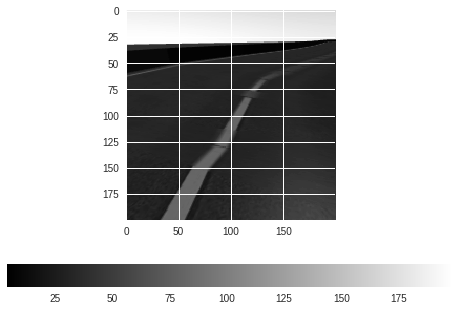

0.020129973122005256 -7.203754862554155 -0.07076182575805938


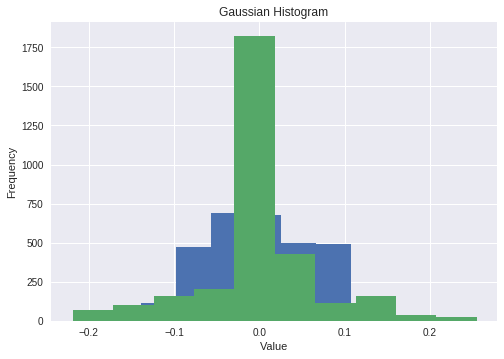

In [0]:
import matplotlib.pyplot as plt
import numpy as np
im = plt.imshow(x[100,:,:,0], cmap='gray')
plt.colorbar(im, orientation='horizontal')
plt.show()
gaussian_numbers = y[:,0]#*180/3.14
plt.hist(gaussian_numbers)
plt.title("Gaussian Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")
fig = plt.gcf()
gaussian_numbers = y[:,1]
plt.hist(gaussian_numbers)
plt.title("Gaussian Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")
fig = plt.gcf()
print(x2[0][100],y[100][0]*180/3.14,y[100][1])

# **CNN**

In [0]:
# np.abs()
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from scipy import ndimage
import tensorflow as tf
from tensorflow.python.framework import ops

In [0]:
def create_placeholders(n_H0, n_W0, n_C0, n_y,n_x):
    X = tf.placeholder(tf.float32, [None, n_H0, n_W0, n_C0])
    X2 = tf.placeholder(tf.float32, [n_x,None])
    Y = tf.placeholder(tf.float32, [n_y,None])
    return X, X2, Y

In [0]:
def initialize_parameters():
    W1 = tf.get_variable("W1", [5, 5, 1, 24], initializer=tf.contrib.layers.xavier_initializer())
    W2 = tf.get_variable("W2", [5, 5, 24, 36], initializer=tf.contrib.layers.xavier_initializer())
    W3 = tf.get_variable("W3", [5, 5, 36, 48], initializer=tf.contrib.layers.xavier_initializer())
    W4 = tf.get_variable("W4", [3, 3, 48, 64], initializer=tf.contrib.layers.xavier_initializer())
    W5 = tf.get_variable("W5", [3, 3, 64, 76], initializer=tf.contrib.layers.xavier_initializer())
    
    W6 = tf.get_variable("W6", [100, 47500], initializer = tf.contrib.layers.xavier_initializer())
    b6 = tf.get_variable("b6", [100, 1], initializer = tf.zeros_initializer())
    W7 = tf.get_variable("W7", [50, 100], initializer = tf.contrib.layers.xavier_initializer())
    b7 = tf.get_variable("b7", [50, 1], initializer = tf.zeros_initializer())
    W8 = tf.get_variable("W8", [10, 50], initializer = tf.contrib.layers.xavier_initializer())
    b8 = tf.get_variable("b8", [10, 1], initializer = tf.zeros_initializer())
    W9 = tf.get_variable("W9", [2, 110], initializer = tf.contrib.layers.xavier_initializer())
    b9 = tf.get_variable("b9", [2, 1], initializer = tf.zeros_initializer())
    
    W1_l2 = tf.get_variable("W1_l2", [2, 1], initializer = tf.contrib.layers.xavier_initializer())
    b1_l2 = tf.get_variable("b1_l2", [2, 1], initializer = tf.zeros_initializer())
    W2_l2 = tf.get_variable("W2_l2", [5, 2], initializer = tf.contrib.layers.xavier_initializer())
    b2_l2 = tf.get_variable("b2_l2", [5, 1], initializer = tf.zeros_initializer())
    W3_l2 = tf.get_variable("W3_l2", [100, 5], initializer = tf.contrib.layers.xavier_initializer())
    b3_l2 = tf.get_variable("b3_l2", [100, 1], initializer = tf.zeros_initializer())
    parameters = {"W3_l2":W3_l2,"b3_l2":b3_l2,"W1_l2":W1_l2,"b1_l2":b1_l2,"W2_l2":W2_l2,"b2_l2":b2_l2,"W1":W1,"W2":W2,"W3":W3,"W4":W4,"W5":W5,"W6":W6,"W7":W7,"W8":W8,"W9":W9,"b6":b6,"b7":b7,"b8":b8,"b9":b9}
    return parameters

In [0]:
def forward_propagation(X, X2, parameters):
    W1 = parameters['W1']
    W2 = parameters['W2']
    W3 = parameters['W3']
    W4 = parameters['W4']
    W5 = parameters['W5']
    W6 = parameters['W6']
    W7 = parameters['W7']
    W8 = parameters['W8']
    W9 = parameters['W9']
    b6 = parameters['b6']
    b7 = parameters['b7']
    b8 = parameters['b8']
    b9 = parameters['b9']
    W1_l2 = parameters['W1_l2']
    b1_l2 = parameters['b1_l2']
    W2_l2 = parameters['W2_l2']
    b2_l2 = parameters['b2_l2']
    W3_l2 = parameters['W3_l2']
    b3_l2 = parameters['b3_l2']
    
    print("first stage")
    
    print(X.shape)
    Z1 = tf.nn.conv2d(X, W1, strides=[1, 2, 2, 1], padding='SAME')
    A1 = tf.nn.relu(Z1)
    print(A1.shape)
    Z2 = tf.nn.conv2d(A1, W2, strides=[1, 2, 2, 1], padding='SAME')
    A2 = tf.nn.relu(Z2)
    print(A2.shape)
    Z3 = tf.nn.conv2d(A2, W3, strides=[1, 2, 2, 1], padding='SAME')
    A3 = tf.nn.relu(Z3)
    print(A3.shape)
    Z4 = tf.nn.conv2d(A3, W4, strides=[1, 1, 1, 1], padding='SAME')
    A4 = tf.nn.relu(Z4)
    print(A4.shape)
    Z5 = tf.nn.conv2d(A4, W5, strides=[1, 1, 1, 1], padding='SAME')
    A5 = tf.nn.relu(Z5)
    print(A5.shape)
    
    print("second stage")
    
    print(X2.shape)
    Z1_l2 = tf.add(tf.matmul(W1_l2, X2), b1_l2)
    A1_l2 = tf.nn.relu(Z1_l2)
    print(A1_l2.shape)
    Z2_l2 = tf.add(tf.matmul(W2_l2, A1_l2), b2_l2)
    A2_l2 = tf.nn.relu(Z2_l2)
    print(A2_l2.shape)
    Z3_l2 = tf.add(tf.matmul(W3_l2, A2_l2), b3_l2)
    A3_l2 = tf.nn.relu(Z3_l2)
    print(A3_l2.shape)
    
    print("flatten")
    
    P = tf.transpose(tf.contrib.layers.flatten(A5))
    print(P.shape)
    
    Z6 = tf.add(tf.matmul(W6, P), b6)
    A6 = tf.nn.relu(Z6)
    print(A6.shape)
    Z7 = tf.add(tf.matmul(W7, A6), b7)
    A7 = tf.nn.relu(Z7)
    print(A7.shape)
    Z8 = tf.add(tf.matmul(W8, A7), b8) 
    A8 = tf.nn.relu(Z8)
    P2 = tf.concat([A8, A3_l2], 0)
    print(A8.shape)
    Z9 = tf.add(tf.matmul(W9, P2), b9)
    print("Z9 shape :")
    print(Z9.shape)
    return Z9

In [0]:
def compute_cost(Z3, Y):
    print("cost")
    print(Z3.shape,Y.shape)
    #cost=tf.reduce_sum(tf.losses.absolute_difference(labels=Y,predictions=Z3))
    #cost=tf.reduce_sum(tf.multiply(Y, tf.log(Z3)) + tf.multiply(1 - Y, tf.log(1 - Z3)))
    #cost=tf.multiply(tf.sqrt(tf.reduce_sum(tf.square(tf.subtract(Y, Z3)))) , 1/64)
    #cost=tf.sqrt(tf.reduce_mean(tf.square(tf.subtract(Y, Z3))))                          #good
    a = tf.reduce_max(tf.abs(tf.subtract(Y, Z3)),axis=1,keepdims=True)
#     b = tf.sqrt(tf.reduce_mean(tf.square(tf.subtract(Y, Z3)),axis=1,keepdims=True))
#     cost=tf.add( tf.multiply(a,1) , tf.multiply(b,1) )
    cost=a
    print(cost.shape)
    #cost=tf.metrics.mean_squared_error(labels=Y,predictions=Z3)
    #print(Y.shape,Z3.shape)
    #cost=tf.reduce_mean(tf.subtract(tf.exp(tf.abs(tf.subtract(Z3, Y))),1))
    print("cost end")
    return cost

In [0]:
def random_mini_batches(X, X2, Y, mini_batch_size):
    m = X.shape[0]                  # number of training examples
    mini_batches = []

    permutation = list(np.random.permutation(m))
    shuffled_X = X[permutation,:]
    shuffled_X2 = X2[:,permutation]
    #shuffled_Y = Y[permutation,:].reshape((m,1))
    shuffled_Y = Y[:,permutation].reshape((2,m))

    num_complete_minibatches = int(math.floor(m/mini_batch_size)) 
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[k * mini_batch_size:(k + 1) * mini_batch_size,:,:,:]
        mini_batch_X2 = shuffled_X2[:,k * mini_batch_size:(k + 1) * mini_batch_size]
        mini_batch_Y = shuffled_Y[:,k * mini_batch_size:(k + 1) * mini_batch_size]
        mini_batch = (mini_batch_X, mini_batch_X2, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    if m % mini_batch_size != 0:
        end = m - mini_batch_size * math.floor(m / mini_batch_size)
        mini_batch_X = shuffled_X[num_complete_minibatches * mini_batch_size:,:,:,:]
        mini_batch_X2 = shuffled_X2[:,num_complete_minibatches * mini_batch_size:]
        mini_batch_Y = shuffled_Y[:,num_complete_minibatches * mini_batch_size:]
        mini_batch = (mini_batch_X, mini_batch_X2, mini_batch_Y)
        mini_batches.append(mini_batch)
        
    return mini_batches

In [0]:
def model(X_train, X2_train, Y_train,X_test, Y_test, learning_rate=0.0009,num_epochs=100, minibatch_size=64, print_cost=True):
    #Y_train=Y_train*180/3.14
    #Y_test=Y_test*180/3.14
    ops.reset_default_graph()                 # to be able to rerun the model without overwriting tf variables
    (m, n_H0, n_W0, n_C0) = X_train.shape
    kk=X_test.shape[0]
    n_y = Y_train.shape[1]
    n_x = X2_train.shape[0]
    qq=Y_train.shape[0]
    Y_train = np.reshape(Y_train,(2,qq))
    costs = []
    tmpp=np.zeros((1,200,200,1))
    tmppy=np.zeros((1,1))
    
    X, X2, Y = create_placeholders(n_H0, n_W0, n_C0, n_y,n_x)
    print("create_placeholders done")
    parameters = initialize_parameters()
    print("initialize_parameters done")
    Z9 = forward_propagation(X, X2, parameters)
    print("forward_propagation done")
    print(Y.shape,Z9.shape)
    cost = compute_cost(Z9, Y)
    print("compute_cost done")
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    #optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
    
    print("AdamOptimizer done")
    
    init = tf.global_variables_initializer()
    print("init done")
    with tf.Session() as sess:
        sess.run(init)
        #for num_of_itera in range (0,5):
          #print("iteration number = %i" % (num_of_itera))
#         for i in range (1,800):
#           tmpp[0,:,:,:]=X_test[i,:,:,:]
#           tmppy[0,:]=Y_test[i,:]
#           y = sess.run(Z3, feed_dict={X:tmpp, Y:tmppy})
#           print("Test = %s y = %s" % (str(y), str(Y_test[i][0])))
        for epoch in range(num_epochs):
          minibatch_cost = 0.
          num_minibatches = int(m / minibatch_size)
          minibatches = random_mini_batches(X_train, X2_train, Y_train, minibatch_size)
          #print(Y_train[1,0])
          for minibatch in minibatches:
              (minibatch_X, minibatch_X2, minibatch_Y) = minibatch
              y,oop, temp_cost = sess.run([Z9,optimizer, cost], feed_dict={X:minibatch_X, X2:minibatch_X2, Y:minibatch_Y})
              #print(temp_cost[0]*180/3.14,temp_cost[1])
              if epoch > 140 :
                print(temp_cost[0]*180/3.14,temp_cost[1])
              minibatch_cost += temp_cost / num_minibatches
              
          if print_cost == True:
              print ("Cost after epoch %i: %f %f" % (epoch, minibatch_cost[0]*180/3.14, minibatch_cost[1]))

          if print_cost == True and epoch % 1 == 0:
              costs.append(minibatch_cost)
#           if minibatch_cost*180/3.14<0.5:
#               break
#         max_error=0
#         max_angle=0
#         for i in range (1,kk):
#           tmpp[0,:,:,:]=X_test[i,:,:,:]
#           tmppy[0,:]=Y_test[i,:]
#           y = sess.run(Z9, feed_dict={X:tmpp, Y:tmppy})
#           print("Test = %s y = %s error = %s" % (str(y), str(Y_test[i][0]),str(abs(Y_test[i][0]-y))))
#           max_error=np.maximum(max_error, np.abs(Y_test[i][0]-y) )
#           max_angle=np.maximum(max_angle,np.abs(Y_test[i][0]))
#           if np.abs(Y_test[i][0]-y)>5:
#             print("############################################################################################")
#         print("max_error = %s max_angle = %s"%(str(max_error),str(max_angle)))
        #plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()
        
        # Calculate accuracy on the test set
        #accuracy = compute_cost(Z3, Y)
        #print(accuracy)
        #train_accuracy = accuracy.eval({X: X_test, Y: Y_test})
        #print("Train Accuracy:", train_accuracy)
        
        return sess.run(parameters)
#     return parameters

create_placeholders done
initialize_parameters done
first stage
(?, 200, 200, 1)
(?, 100, 100, 24)
(?, 50, 50, 36)
(?, 25, 25, 48)
(?, 25, 25, 64)
(?, 25, 25, 76)
second stage
(1, ?)
(2, ?)
(5, ?)
(100, ?)
flatten
(47500, ?)
(100, ?)
(50, ?)
(10, ?)
Z9 shape :
(2, ?)
forward_propagation done
(2, ?) (2, ?)
cost
(2, ?) (2, ?)
(2, 1)
cost end
compute_cost done
AdamOptimizer done
init done
Cost after epoch 0: 9.597960 0.190596
Cost after epoch 1: 9.531829 0.181936
Cost after epoch 2: 9.788140 0.175632
Cost after epoch 3: 9.487171 0.166583
Cost after epoch 4: 9.398969 0.158752
Cost after epoch 5: 9.063822 0.153595
Cost after epoch 6: 8.624462 0.156413
Cost after epoch 7: 8.617392 0.155698
Cost after epoch 8: 8.714693 0.151131
Cost after epoch 9: 8.420556 0.149753
Cost after epoch 10: 8.156890 0.147098
Cost after epoch 11: 8.187491 0.149774
Cost after epoch 12: 8.019423 0.145905
Cost after epoch 13: 8.024578 0.146402
Cost after epoch 14: 7.998808 0.146147
Cost after epoch 15: 7.867495 0.1452

Cost after epoch 61: 6.419629 0.125998
Cost after epoch 62: 6.217453 0.125512
Cost after epoch 63: 6.491686 0.128172
Cost after epoch 64: 6.386066 0.126556
Cost after epoch 65: 6.451266 0.125891
Cost after epoch 66: 6.430680 0.124599
Cost after epoch 67: 6.397978 0.124033
Cost after epoch 68: 6.155892 0.125002
Cost after epoch 69: 6.365957 0.123478
Cost after epoch 70: 6.282259 0.122888
Cost after epoch 71: 6.282934 0.122988
Cost after epoch 72: 6.275096 0.123857
Cost after epoch 73: 6.125626 0.120648
Cost after epoch 74: 6.167896 0.123518
Cost after epoch 75: 6.028759 0.121845
Cost after epoch 76: 5.970701 0.121271
Cost after epoch 77: 6.047725 0.119532
Cost after epoch 78: 5.953393 0.119257
Cost after epoch 79: 6.015453 0.120588
Cost after epoch 80: 5.902726 0.119900
Cost after epoch 81: 5.833149 0.118098
Cost after epoch 82: 5.876888 0.117501
Cost after epoch 83: 5.900320 0.120469
Cost after epoch 84: 5.743048 0.117824
Cost after epoch 85: 5.795198 0.115718
Cost after epoch 86: 5.78

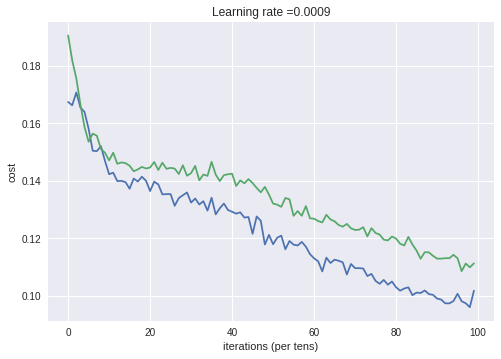

In [0]:
# xtemp=x[0:80,:,:,:]
# ytemp=y[0:80,:]
#print(xtemp)


# y_mod=np.zeros((y.shape[0],2))
# for i in range (0,y.shape[0]):
#   y_mod[i][0]=y[i][0]
#   if y[i][1]==0 :
#     y_mod[i][1]=y[i][1]+0.0002
#   else :
#     y_mod[i][1]=y[i][1]


# gaussian_numbers = y[:,1]
# plt.hist(gaussian_numbers)
# plt.title("Gaussian Histogram")
# plt.xlabel("Value")
# plt.ylabel("Frequency")
# fig = plt.gcf()
# print(np.min(y,axis=0))

parameters = model(x/255,x2, y, x/255, y) #*180/3.14
# for i in y_test:
#   if i==0 :
#     print(i)

In [0]:
# np.abs()

def create_place(n_H0, n_W0, n_C0,n_x):
    X = tf.placeholder(tf.float32, [None, n_H0, n_W0, n_C0])
    X2 = tf.placeholder(tf.float32, [n_x,None])
    return X, X2


def forward_prop(X, X2, parameters):
    W1 = parameters['W1']
    W2 = parameters['W2']
    W3 = parameters['W3']
    W4 = parameters['W4']
    W5 = parameters['W5']
    W6 = parameters['W6']
    W7 = parameters['W7']
    W8 = parameters['W8']
    W9 = parameters['W9']
    b6 = parameters['b6']
    b7 = parameters['b7']
    b8 = parameters['b8']
    b9 = parameters['b9']
    W1_l2 = parameters['W1_l2']
    b1_l2 = parameters['b1_l2']
    W2_l2 = parameters['W2_l2']
    b2_l2 = parameters['b2_l2']
    W3_l2 = parameters['W3_l2']
    b3_l2 = parameters['b3_l2']
    
    print("first stage")
    
    print(X.shape)
    Z1 = tf.nn.conv2d(X, W1, strides=[1, 2, 2, 1], padding='SAME')
    A1 = tf.nn.relu(Z1)
    print(A1.shape)
    Z2 = tf.nn.conv2d(A1, W2, strides=[1, 2, 2, 1], padding='SAME')
    A2 = tf.nn.relu(Z2)
    print(A2.shape)
    Z3 = tf.nn.conv2d(A2, W3, strides=[1, 2, 2, 1], padding='SAME')
    A3 = tf.nn.relu(Z3)
    print(A3.shape)
    Z4 = tf.nn.conv2d(A3, W4, strides=[1, 1, 1, 1], padding='SAME')
    A4 = tf.nn.relu(Z4)
    print(A4.shape)
    Z5 = tf.nn.conv2d(A4, W5, strides=[1, 1, 1, 1], padding='SAME')
    A5 = tf.nn.relu(Z5)
    print(A5.shape)
    
    print("second stage")
    
    print(X2.shape)
    Z1_l2 = tf.add(tf.matmul(W1_l2, X2), b1_l2)
    A1_l2 = tf.nn.relu(Z1_l2)
    print(A1_l2.shape)
    Z2_l2 = tf.add(tf.matmul(W2_l2, A1_l2), b2_l2)
    A2_l2 = tf.nn.relu(Z2_l2)
    print(A2_l2.shape)
    Z3_l2 = tf.add(tf.matmul(W3_l2, A2_l2), b3_l2)
    A3_l2 = tf.nn.relu(Z3_l2)
    print(A3_l2.shape)
    
    print("flatten")
    
    P = tf.transpose(tf.contrib.layers.flatten(A5))
    print(P.shape)
    
    Z6 = tf.add(tf.matmul(W6, P), b6)
    A6 = tf.nn.relu(Z6)
    print(A6.shape)
    Z7 = tf.add(tf.matmul(W7, A6), b7)
    A7 = tf.nn.relu(Z7)
    print(A7.shape)
    Z8 = tf.add(tf.matmul(W8, A7), b8) 
    A8 = tf.nn.relu(Z8)
    P2 = tf.concat([A8, A3_l2], 0)
    print(A8.shape)
    Z9 = tf.add(tf.matmul(W9, P2), b9)
    print("Z9 shape :")
    print(Z9.shape)
    return Z9


max_error=np.zeros((2,1))
max_angle=0
tmpp=np.zeros((1,200,200,1))
tmpp2=np.zeros((1,1))
m=x.shape[0]
X,X2 = create_place(200, 200, 1, 1)
print(X.shape,X2.shape)
#parameters = cnn_algo.initialize_parameters()
Z3 = forward_prop(X, X2, parameters)
print(Z3.shape)

init = tf.global_variables_initializer()
sess = tf.Session()
for i in range (0,m):
  sess.run(init)
  tmpp[0,:,:,:]=x[i,:,:,:]
  tmpp2[0,0]=x2[0,i]
  y_res = sess.run(Z3, feed_dict={X:tmpp/255,X2:tmpp2})
  print("a= %f y= %f e= %f a= %f y= %f e= %f" % ( y_res[0][0]*180/3.14,y[i][0]*180/3.14,(y[i][0]-y_res[0][0])*180/3.14,y_res[1][0],y[i][1],np.abs((y[i][1]-y_res[1][0])/y[i][1]) ))
#   print(y_res.shape)
  max_error[0,0]=np.maximum(max_error[0,0], np.abs((y[i][0]*180/3.14)-(y_res[0,0]*180/3.14)) )
  max_error[1,0]=np.maximum(max_error[1,0], np.abs((y[i][1]-y_res[1,0])/y[i][1]) )
  max_angle=np.maximum(max_angle,np.abs(y[i][0]*180/3.14))
  if np.abs((y[i][0]-y_res[0,0])*180/3.14)>8:
    print("###########################################################################################")
print("max_error=%s max_angle=%s"%(str(max_error),str(max_angle)))


(?, 200, 200, 1) (1, ?)
first stage
(?, 200, 200, 1)
(?, 100, 100, 24)
(?, 50, 50, 36)
(?, 25, 25, 48)
(?, 25, 25, 64)
(?, 25, 25, 76)
second stage
(1, ?)
(2, ?)
(5, ?)
(100, ?)
flatten
(47500, ?)
(100, ?)
(50, ?)
(10, ?)
Z9 shape :
(2, ?)
(2, ?)
a= -4.133872 y= -7.286188 e= -3.152316 a= -0.005100 y= -0.004762 e= 0.071094
a= -4.678645 y= -7.256494 e= -2.577849 a= -0.021348 y= -0.004762 e= 3.483123
a= -4.432649 y= -7.256494 e= -2.823844 a= -0.081044 y= -0.004762 e= 16.019575
a= -3.245582 y= -7.174748 e= -3.929166 a= -0.009636 y= -0.004762 e= 1.023597
a= -3.691323 y= -7.104296 e= -3.412974 a= -0.124559 y= -0.004762 e= 25.157891
a= -3.423909 y= -7.079360 e= -3.655451 a= -0.011612 y= -0.004762 e= 1.438654
a= -3.618078 y= -8.206940 e= -4.588862 a= -0.115504 y= -0.004762 e= 23.256287
a= -4.244249 y= -8.173462 e= -3.929212 a= -0.028267 y= -0.004762 e= 4.936137
a= -4.159525 y= -8.106506 e= -3.946981 a= -0.091661 y= -0.004762 e= 18.249160
a= -4.226012 y= -8.106506 e= -3.880494 a= -0.021013 y= -

a= 4.125321 y= -2.666110 e= -6.791431 a= 0.018364 y= 0.095238 e= 0.807183
a= 4.642103 y= -2.593703 e= -7.235806 a= 0.016971 y= 0.097238 e= 0.825467
a= 2.670413 y= -2.515019 e= -5.185432 a= 0.011904 y= 0.101238 e= 0.882417
a= 4.025124 y= -2.515019 e= -6.540143 a= 0.014438 y= 0.103238 e= 0.860148
a= 3.188406 y= -2.515019 e= -5.703424 a= 0.019577 y= 0.103238 e= 0.810374
a= 4.364265 y= -2.370245 e= -6.734510 a= 0.027714 y= 0.105238 e= 0.736651
a= 2.840892 y= -2.310117 e= -5.151008 a= 0.016101 y= 0.109238 e= 0.852610
a= 3.915809 y= -2.259499 e= -6.175308 a= 0.017689 y= 0.111238 e= 0.840984
a= 2.752684 y= -2.205482 e= -4.958166 a= 0.019733 y= 0.113238 e= 0.825740
a= 4.216562 y= -2.149716 e= -6.366278 a= 0.024011 y= 0.117238 e= 0.795196
a= 2.624512 y= -2.149716 e= -4.774228 a= 0.017011 y= 0.119238 e= 0.857332
a= 3.220106 y= -2.094002 e= -5.314108 a= 0.018488 y= 0.121238 e= 0.847505
a= 2.730598 y= -2.045402 e= -4.776000 a= 0.017708 y= 0.125238 e= 0.858605
a= 3.586734 y= -2.005005 e= -5.591739 


a= 1.503255 y= -4.982950 e= -6.486206 a= 0.010822 y= -0.002762 e= 4.918567
a= 1.792503 y= -4.944910 e= -6.737412 a= 0.014493 y= -0.002762 e= 6.247725
a= 1.204876 y= -4.944910 e= -6.149786 a= 0.007448 y= -0.002762 e= 3.696933
a= 2.038967 y= -4.851636 e= -6.890603 a= 0.018601 y= -0.002762 e= 7.735099
a= 2.452970 y= -4.773394 e= -7.226364 a= 0.027408 y= -0.002762 e= 10.923834
a= 2.669059 y= -4.717147 e= -7.386205 a= 0.031353 y= -0.002762 e= 12.352194
a= 2.128984 y= -4.717147 e= -6.846131 a= 0.035919 y= -0.000762 e= 48.148732
a= 2.747687 y= -4.702643 e= -7.450331 a= 0.043318 y= -0.000762 e= 57.860433
a= 1.966183 y= -4.631784 e= -6.597967 a= 0.031850 y= -0.000762 e= 42.807229
a= 1.999513 y= -4.572682 e= -6.572195 a= 0.039273 y= -0.000762 e= 52.551341
a= 2.222030 y= -4.503262 e= -6.725291 a= 0.020752 y= -0.000762 e= 28.240130
a= 3.127848 y= -4.449738 e= -7.577586 a= 0.027959 y= 0.001238 e= 21.581054
a= 1.610753 y= -4.391645 e= -6.002398 a= 0.025200 y= 0.001238 e= 19.352305
a= 3.589259 y= -4

a= -0.577155 y= -5.805889 e= -5.228734 a= 0.018411 y= 0.001238 e= 13.869242
a= -0.973124 y= -5.708322 e= -4.735198 a= 0.000729 y= 0.001238 e= 0.411329
a= -1.373181 y= -5.613913 e= -4.240732 a= 0.000396 y= 0.001238 e= 0.680401
a= -1.684945 y= -5.553464 e= -3.868520 a= 0.013270 y= 0.001238 e= 9.717459
a= -1.213051 y= -5.476592 e= -4.263541 a= 0.022500 y= 0.001238 e= 17.172084
a= -1.497705 y= -5.430812 e= -3.933107 a= 0.011819 y= 0.001238 e= 8.545203
a= -0.856032 y= -5.380217 e= -4.524185 a= 0.016328 y= 0.001238 e= 12.187077
a= -0.723219 y= -5.380217 e= -4.656998 a= 0.019000 y= 0.001238 e= 14.345115
a= -0.983710 y= -5.200349 e= -4.216639 a= 0.021289 y= 0.001238 e= 16.194057
a= -0.920360 y= -5.200349 e= -4.279989 a= 0.016268 y= 0.001238 e= 12.138887
a= -0.762162 y= -5.096626 e= -4.334464 a= 0.022533 y= 0.001238 e= 17.198489
a= -0.566189 y= -5.096626 e= -4.530436 a= 0.023704 y= 0.001238 e= 18.144416
a= -0.319675 y= -4.993636 e= -4.673961 a= 0.018815 y= 0.003238 e= 4.810312
a= -0.337728 y= -

a= -3.274408 y= -3.876719 e= -0.602311 a= 0.043048 y= 0.013238 e= 2.251775
a= -2.403882 y= -3.876719 e= -1.472836 a= 0.062372 y= 0.013238 e= 3.711525
a= -1.744603 y= -3.880382 e= -2.135778 a= 0.054116 y= 0.013238 e= 3.087875
a= -1.598457 y= -3.869318 e= -2.270861 a= 0.039415 y= 0.013238 e= 1.977389
a= -2.424882 y= -3.855250 e= -1.430369 a= 0.041696 y= 0.013238 e= 2.149658
a= -3.020385 y= -3.855250 e= -0.834866 a= 0.047101 y= 0.013238 e= 2.557966
a= -2.004264 y= -3.792291 e= -1.788026 a= 0.047389 y= 0.013238 e= 2.579706
a= -3.049062 y= -3.792291 e= -0.743229 a= 0.053934 y= 0.013238 e= 3.074091
a= -3.212059 y= -3.743243 e= -0.531184 a= 0.047595 y= 0.013238 e= 2.595321
a= -3.129264 y= -3.707375 e= -0.578111 a= 0.037231 y= 0.015238 e= 1.443257
a= -3.045268 y= -3.681224 e= -0.635955 a= 0.033986 y= 0.015238 e= 1.230322
a= -2.202511 y= -3.680593 e= -1.478082 a= 0.033939 y= 0.015238 e= 1.227212
a= -2.330381 y= -3.680593 e= -1.350212 a= 0.040582 y= 0.015238 e= 1.663185
a= -1.186172 y= -3.677652

a= -0.052222 y= 2.275939 e= 2.328162 a= 0.054860 y= 0.003238 e= 15.941670
a= -0.023842 y= 2.357977 e= 2.381819 a= 0.048866 y= 0.003238 e= 14.090643
a= -0.573650 y= 2.320670 e= 2.894320 a= 0.050417 y= 0.003238 e= 14.569516
a= 0.681579 y= 2.317334 e= 1.635755 a= 0.051632 y= 0.003238 e= 14.944673
a= 0.726754 y= 2.306270 e= 1.579516 a= 0.054642 y= 0.003238 e= 15.874312
a= -1.461088 y= 2.257211 e= 3.718299 a= 0.048859 y= 0.003238 e= 14.088547
a= -4.476312 y= 2.236580 e= 6.712892 a= 0.067211 y= 0.005238 e= 11.831062
a= -4.200643 y= 2.236580 e= 6.437224 a= 0.064149 y= 0.005238 e= 11.246505
a= -3.659445 y= 2.211311 e= 5.870756 a= 0.073909 y= 0.005238 e= 13.109659
a= -4.904641 y= 2.191500 e= 7.096141 a= 0.055297 y= 0.005238 e= 9.556460
a= -4.774210 y= 2.175506 e= 6.949717 a= 0.052835 y= 0.005238 e= 9.086500
a= 0.214957 y= 2.148925 e= 1.933968 a= 0.039822 y= 0.005238 e= 6.602237
a= -0.478409 y= 2.108757 e= 2.587166 a= 0.039045 y= 0.005238 e= 6.453889
a= -0.340648 y= 2.108757 e= 2.449405 a= 0.051

a= -3.126864 y= 5.395764 e= 8.522628 a= 0.073753 y= -0.154762 e= 1.476557
###########################################################################################
a= -3.102807 y= 5.395764 e= 8.498570 a= 0.061773 y= -0.156762 e= 1.394055
###########################################################################################
a= -3.479039 y= 5.388816 e= 8.867854 a= 0.056661 y= -0.160762 e= 1.352454
###########################################################################################
a= -3.158523 y= 5.340336 e= 8.498860 a= 0.051329 y= -0.162762 e= 1.315364
###########################################################################################
a= -2.783313 y= 5.309444 e= 8.092757 a= 0.057619 y= -0.164762 e= 1.349713
###########################################################################################
a= -2.810188 y= 5.309444 e= 8.119632 a= 0.061878 y= -0.164762 e= 1.375560
###########################################################################################
a= -

a= -4.691296 y= 6.543201 e= 11.234496 a= 0.037077 y= -0.034762 e= 2.066597
###########################################################################################
a= -4.685911 y= 6.628156 e= 11.314067 a= 0.037064 y= -0.034762 e= 2.066217
###########################################################################################
a= -3.072569 y= 6.628156 e= 9.700725 a= 0.033458 y= -0.034762 e= 1.962499
###########################################################################################
a= -4.462015 y= 6.659914 e= 11.121929 a= 0.031846 y= -0.034762 e= 1.916107
###########################################################################################
a= -4.693154 y= 6.707494 e= 11.400648 a= 0.036010 y= -0.034762 e= 2.035900
###########################################################################################
a= -4.283181 y= 7.001627 e= 11.284808 a= 0.038188 y= -0.034762 e= 2.098559
###########################################################################################

a= -2.971768 y= 4.913226 e= 7.884994 a= 0.096233 y= -0.004762 e= 21.209366
a= 0.462231 y= 4.808895 e= 4.346664 a= 0.157769 y= -0.004762 e= 34.132057
a= -3.281410 y= 4.703446 e= 7.984856 a= 0.090932 y= -0.002762 e= 33.924739
a= -2.182993 y= 4.595274 e= 6.778267 a= 0.138790 y= -0.002762 e= 51.253020
a= -3.211332 y= 4.495104 e= 7.706436 a= 0.092998 y= -0.002762 e= 34.672679
a= -1.416114 y= 4.495104 e= 5.911218 a= 0.086217 y= -0.002762 e= 32.217385
a= -2.585909 y= 4.401676 e= 6.987586 a= 0.089188 y= -0.002762 e= 33.293126
a= -3.192648 y= 4.282504 e= 7.475152 a= 0.087071 y= -0.002762 e= 32.526736
a= -2.608361 y= 4.282504 e= 6.890864 a= 0.083287 y= -0.002762 e= 31.156460
a= -1.949381 y= 4.112524 e= 6.061905 a= 0.072988 y= -0.002762 e= 27.427301
a= 0.219851 y= 3.994962 e= 3.775111 a= 0.065163 y= -0.002762 e= 24.594353
a= -0.858597 y= 3.906350 e= 4.764947 a= 0.066906 y= -0.002762 e= 25.225138
a= -2.513590 y= 3.906350 e= 6.419940 a= 0.067845 y= -0.000762 e= 90.056269
a= -4.014752 y= 3.662799 e=

a= -3.056972 y= 4.428327 e= 7.485299 a= 0.066270 y= 0.105238 e= 0.370285
a= -2.814765 y= 4.351649 e= 7.166414 a= 0.067867 y= 0.107238 e= 0.367142
a= -4.343898 y= 4.240146 e= 8.584044 a= 0.048296 y= 0.109238 e= 0.557885
###########################################################################################
a= -1.341436 y= 4.217606 e= 5.559042 a= 0.042340 y= -0.004762 e= 9.891514
a= -1.768594 y= 4.217606 e= 5.986201 a= 0.037046 y= -0.004762 e= 8.779748
a= -1.626950 y= 4.198162 e= 5.825112 a= 0.037594 y= -0.004762 e= 8.894936
a= -1.892087 y= 4.190102 e= 6.082189 a= 0.024857 y= -0.004762 e= 6.220022
a= -2.051802 y= 4.209466 e= 6.261268 a= 0.028541 y= -0.004762 e= 6.993698
a= -2.145805 y= 4.212499 e= 6.358303 a= 0.027407 y= -0.004762 e= 6.755535
a= -1.548137 y= 4.821466 e= 6.369603 a= 0.067317 y= -0.004762 e= 15.136713
a= -1.424122 y= 4.821466 e= 6.245588 a= 0.056045 y= -0.004762 e= 12.769716
a= -1.445873 y= 4.858836 e= 6.304709 a= 0.053627 y= -0.004762 e= 12.261869
a= -1.642860 y= 4.81

a= 1.028866 y= -1.206459 e= -2.235324 a= 0.024270 y= -0.002762 e= 9.787636
a= 0.743726 y= -1.216571 e= -1.960297 a= 0.023256 y= -0.002762 e= 9.420447
a= 1.234722 y= -1.253024 e= -2.487746 a= 0.012420 y= -0.002762 e= 5.497053
a= 0.630983 y= -1.253024 e= -1.884007 a= 0.010832 y= -0.002762 e= 4.921913
a= -0.063511 y= -1.286404 e= -1.222893 a= 0.009318 y= -0.002762 e= 4.373750
a= -0.394624 y= -1.324284 e= -0.929660 a= 0.007827 y= -0.002762 e= 3.833914
a= -0.218584 y= -1.368184 e= -1.149600 a= 0.006696 y= -0.002762 e= 3.424323
a= -0.811808 y= -1.411068 e= -0.599261 a= -0.005239 y= -0.002762 e= 0.897007
a= -0.737746 y= -1.434967 e= -0.697221 a= -0.001115 y= -0.002762 e= 0.596166
a= -0.301159 y= -1.470182 e= -1.169023 a= 0.004710 y= -0.002762 e= 2.705340
a= -0.102492 y= -1.510985 e= -1.408493 a= 0.003583 y= -0.002762 e= 2.297331
a= -0.258439 y= -1.548040 e= -1.289601 a= 0.002127 y= -0.002762 e= 1.770080
a= -0.142959 y= -1.548040 e= -1.405081 a= -0.001133 y= -0.002762 e= 0.589793
a= 0.552500 y

a= 0.381094 y= -0.126031 e= -0.507126 a= -0.042937 y= 0.011238 e= 4.820638
a= 0.935155 y= -0.049010 e= -0.984165 a= -0.054465 y= 0.015238 e= 4.574255
a= 0.799828 y= -0.175534 e= -0.975363 a= -0.048827 y= 0.017238 e= 3.832495
a= 2.076923 y= -0.422070 e= -2.498993 a= -0.063104 y= 0.019238 e= 4.280138
a= 0.032077 y= -0.627294 e= -0.659372 a= -0.054005 y= 0.023238 e= 3.323957
a= 0.342514 y= -0.710387 e= -1.052900 a= -0.029025 y= 0.025238 e= 2.150058
a= 0.885308 y= -0.601722 e= -1.487030 a= -0.049445 y= 0.027238 e= 2.815267
a= 0.189383 y= -0.601722 e= -0.791104 a= -0.040808 y= 0.031238 e= 2.306347
a= -0.309226 y= -0.513701 e= -0.204475 a= -0.029557 y= 0.033238 e= 1.889260
a= 0.417450 y= -0.434184 e= -0.851634 a= -0.048924 y= 0.037238 e= 2.313814
a= 2.545838 y= -0.317150 e= -2.862988 a= -0.064340 y= 0.039238 e= 2.639722
a= -0.468140 y= -0.569585 e= -0.101445 a= -0.050606 y= 0.043238 e= 2.170398
a= -0.402796 y= -0.544093 e= -0.141297 a= -0.058475 y= 0.045238 e= 2.292599
a= 1.450500 y= -0.5440

a= 0.053590 y= 1.035808 e= 0.982218 a= 0.053441 y= -0.006762 e= 8.903380
a= -0.136471 y= 1.007283 e= 1.143755 a= 0.049931 y= -0.006762 e= 8.384213
a= -0.424990 y= 1.044929 e= 1.469918 a= 0.060936 y= -0.006762 e= 10.011824
a= 0.043486 y= 1.095587 e= 1.052101 a= 0.056603 y= -0.006762 e= 9.370912
a= -0.591710 y= 1.095587 e= 1.687297 a= 0.067187 y= -0.006762 e= 10.936183
a= 0.282848 y= 1.111305 e= 0.828457 a= 0.053566 y= -0.006762 e= 8.921866
a= 0.668301 y= 1.090639 e= 0.422339 a= 0.049297 y= -0.006762 e= 8.290556
a= 0.124291 y= 1.079708 e= 0.955416 a= 0.043662 y= -0.006762 e= 7.457072
a= 0.466357 y= 1.093190 e= 0.626833 a= 0.046614 y= -0.006762 e= 7.893637
a= 0.399324 y= 1.176541 e= 0.777216 a= 0.049223 y= -0.006762 e= 8.279609
a= 0.020111 y= 1.176541 e= 1.156430 a= 0.050094 y= -0.008762 e= 6.717292
a= -1.099802 y= 1.134344 e= 2.234146 a= 0.048776 y= -0.010762 e= 5.532336
a= -4.665100 y= 1.116246 e= 5.781346 a= 0.083001 y= -0.010762 e= 8.712559
a= -5.836829 y= 1.101267 e= 6.938097 a= 0.08

a= 1.288323 y= 1.192930 e= -0.095393 a= 0.027398 y= -0.004762 e= 6.753592
a= 1.486488 y= 1.188934 e= -0.297554 a= 0.016519 y= -0.004762 e= 4.469075
a= 1.182086 y= 1.188934 e= 0.006848 a= 0.019668 y= -0.004762 e= 5.130378
a= 0.740530 y= 1.263279 e= 0.522749 a= 0.037721 y= -0.004762 e= 8.921531
a= -0.654391 y= 1.376467 e= 2.030858 a= 0.034495 y= -0.004762 e= 8.244060
a= -0.354109 y= 1.509501 e= 1.863610 a= 0.044194 y= -0.004762 e= 10.280955
a= 1.112786 y= 1.624655 e= 0.511868 a= 0.053555 y= -0.004762 e= 12.246753
a= -0.147529 y= 1.543855 e= 1.691384 a= 0.022576 y= -0.004762 e= 5.741102
a= -0.922826 y= 1.531318 e= 2.454144 a= 0.014564 y= -0.004762 e= 4.058411
a= 0.245095 y= 1.531318 e= 1.286223 a= 0.009438 y= -0.004762 e= 2.982079
a= 1.892856 y= 1.570959 e= -0.321897 a= 0.031790 y= -0.004762 e= 7.675954
a= 1.268223 y= 1.570959 e= 0.302735 a= 0.030213 y= -0.004762 e= 7.344912
a= 0.597288 y= 1.414829 e= 0.817540 a= 0.027838 y= -0.004762 e= 6.846044
a= 0.284600 y= 1.120844 e= 0.836244 a= 0.0

# **Saving Parameters**

In [0]:
#######################################################################################

In [0]:
np.abs()
list1 = parameters['W1'].reshape(5*5*1*24)
W1 = ','.join(str(e) for e in list1) #[5, 5, 1, 24]
list1 = parameters['W2'].reshape(5*5*24*36)
W2 = ','.join(str(e) for e in list1) #[5, 5, 24, 36]
list1 = parameters['W3'].reshape(5*5*36*48)
W3 = ','.join(str(e) for e in list1) #[5, 5, 36, 48]
list1 = parameters['W4'].reshape(3*3*48*64)
W4 = ','.join(str(e) for e in list1) #[3, 3, 48, 64]
list1 = parameters['W5'].reshape(3*3*64*76)
W5 = ','.join(str(e) for e in list1) #[3, 3, 64, 76]
list1 = parameters['W6'].reshape(100*48000)
W6 = ','.join(str(e) for e in list1) #[100, 47500]
list1 = parameters['b6'].reshape(100*1)
b6 = ','.join(str(e) for e in list1) #[100, 1]
list1 = parameters['W7'].reshape(50*100)
W7 = ','.join(str(e) for e in list1) #[50, 100]
list1 = parameters['b7'].reshape(50*1)
b7 = ','.join(str(e) for e in list1) #[50, 1]
list1 = parameters['W8'].reshape(10*50)
W8 = ','.join(str(e) for e in list1) #[10, 50]
list1 = parameters['b8'].reshape(10*1)
b8 = ','.join(str(e) for e in list1) #[10, 1]
list1 = parameters['W9'].reshape(2*10)
W9 = ','.join(str(e) for e in list1) #[1, 10]
list1 = parameters['b9'].reshape(2*1)
b9 = ','.join(str(e) for e in list1) #[1, 1]

list1 = parameters['W1_l2'].reshape(500*1)
W1_l2 = ','.join(str(e) for e in list1)
list1 = parameters['b1_l2'].reshape(500*1)
b1_l2 = ','.join(str(e) for e in list1)
list1 = parameters['W2_l2'].reshape(500*500)
W2_l2 = ','.join(str(e) for e in list1)
list1 = parameters['b2_l2'].reshape(500*1)
b2_l2 = ','.join(str(e) for e in list1)

ValueError: ignored

In [0]:

# Install the PyDrive wrapper & import libraries.
# This only needs to be done once in a notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Create & upload a text file.
out1 = drive.CreateFile({'title': 'W1.txt'})
out1.SetContentString(W1)
out1.Upload()

out2 = drive.CreateFile({'title': 'W2.txt'})
out2.SetContentString(W2)
out2.Upload()

out3 = drive.CreateFile({'title': 'W3.txt'})
out3.SetContentString(W3)
out3.Upload()

out4 = drive.CreateFile({'title': 'W4.txt'})
out4.SetContentString(W4)
out4.Upload()

out5 = drive.CreateFile({'title': 'W5.txt'})
out5.SetContentString(W5)
out5.Upload()

out6 = drive.CreateFile({'title': 'W6.txt'})
out6.SetContentString(W6)
out6.Upload()

out7 = drive.CreateFile({'title': 'W7.txt'})
out7.SetContentString(W7)
out7.Upload()

out8 = drive.CreateFile({'title': 'W8.txt'})
out8.SetContentString(W8)
out8.Upload()

out9 = drive.CreateFile({'title': 'W9.txt'})
out9.SetContentString(W9)
out9.Upload()

out10 = drive.CreateFile({'title': 'b6.txt'})
out10.SetContentString(b6)
out10.Upload()

out11 = drive.CreateFile({'title': 'b7.txt'})
out11.SetContentString(b7)
out11.Upload()

out12 = drive.CreateFile({'title': 'b8.txt'})
out12.SetContentString(b8)
out12.Upload()

out13 = drive.CreateFile({'title': 'b9.txt'})
out13.SetContentString(b9)
out13.Upload()

out13 = drive.CreateFile({'title': 'W1_l2.txt'})
out13.SetContentString(W1_l2)
out13.Upload()

out13 = drive.CreateFile({'title': 'W2_l2.txt'})
out13.SetContentString(W1_l2)
out13.Upload()

out13 = drive.CreateFile({'title': 'b1_l2.txt'})
out13.SetContentString(W1_l2)
out13.Upload()

out13 = drive.CreateFile({'title': 'b2_l2.txt'})
out13.SetContentString(W1_l2)
out13.Upload()
#np.abs()

# Testing **Code** **1**

In [0]:
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials

# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)


# def create_placeholders(n_H0, n_W0, n_C0):
#   X = tf.placeholder(tf.float32, [None, n_H0, n_W0, n_C0])
#   return X
#   W1_tf = tf.constant(parameters['W1'])
#   W2_tf = tf.constant(parameters['W2'])
#   W3_tf = tf.constant(parameters['W3'])
#   W4_tf = tf.constant(parameters['W4'])
#   W5_tf = tf.constant(parameters['W5'])
#   W6_tf = tf.constant(parameters['W6'])
#   W7_tf = tf.constant(parameters['W7'])
#   W8_tf = tf.constant(parameters['W8'])
#   W9_tf = tf.constant(parameters['W9'])
#   b6_tf = tf.constant(parameters['b6'])
#   b7_tf = tf.constant(parameters['b7'])
#   b8_tf = tf.constant(parameters['b8'])
#   b9_tf = tf.constant(parameters['b9'])
#   parameters = {"W1":W1_tf,"W2":W2_tf,"W3":W3_tf,"W4":W4_tf,"W5":W5_tf,"W6":W6_tf,"W7":W7_tf,"W8":W8_tf,"W9":W9_tf,"b6":b6_tf,"b7":b7_tf,"b8":b8_tf,"b9":b9_tf}
# def forward_propagation(X, parameters):
#   W1 = parameters['W1']
#   W2 = parameters['W2']
#   W3 = parameters['W3']
#   W4 = parameters['W4']
#   W5 = parameters['W5']
#   W6 = parameters['W6']
#   W7 = parameters['W7']
#   W8 = parameters['W8']
#   W9 = parameters['W9']
#   b6 = parameters['b6']
#   b7 = parameters['b7']
#   b8 = parameters['b8']
#   b9 = parameters['b9']
  

#   Z1 = tf.nn.conv2d(X, W1, strides=[1, 2, 2, 1], padding='SAME')
#   A1 = tf.nn.relu(Z1)
#   Z2 = tf.nn.conv2d(A1, W2, strides=[1, 2, 2, 1], padding='SAME')
#   A2 = tf.nn.relu(Z2)
#   Z3 = tf.nn.conv2d(A2, W3, strides=[1, 2, 2, 1], padding='SAME')
#   A3 = tf.nn.relu(Z3)
#   Z4 = tf.nn.conv2d(A3, W4, strides=[1, 1, 1, 1], padding='SAME')
#   A4 = tf.nn.relu(Z4)
#   Z5 = tf.nn.conv2d(A4, W5, strides=[1, 1, 1, 1], padding='SAME')
#   A5 = tf.nn.relu(Z5)

#   P = tf.transpose(tf.contrib.layers.flatten(A5))

#   Z6 = tf.add(tf.matmul(W6, P), b6)
#   A6 = tf.nn.relu(Z6)
#   Z7 = tf.add(tf.matmul(W7, A6), b7)
#   A7 = tf.nn.relu(Z7)
#   Z8 = tf.add(tf.matmul(W8, A7), b8) 
#   A8 = tf.nn.relu(Z8)
#   Z9 = tf.add(tf.matmul(W9, A8), b9)
#   return Z9
# m=x_test.shape[0]
# max_error=0
# max_angle=0
# tmpp=np.zeros((1,200,200,1))
# X = create_placeholders(200, 200, 1)
# #parameters = cnn_algo.initialize_parameters()
# Z3 = forward_propagation(X, parameters)

# init = tf.global_variables_initializer()
# sess = tf.Session()
# for i in range (0,m):
#   sess.run(init)
#   tmpp[0,:,:,:]=x_test[i,:,:,:]
#   y = sess.run(Z3, feed_dict={X:tmpp/255})
#   print("Test = %s y = %s error = %s" % (str(y), str(y_test[i][0]*180/3.14),str(abs((y_test[i][0]*180/3.14)-y))))
#   max_error=np.maximum(max_error, np.abs((y_test[i][0]*180/3.14)-y) )
#   max_angle=np.maximum(max_angle,np.abs(y_test[i][0]*180/3.14))
# print("max_error = %s max_angle = %s"%(str(max_error),str(max_angle)))

# **Testing Code 2**

In [0]:
# np.abs()
!pip install -U -q PyDrive
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#testing on train data
file_test1 = drive.CreateFile({'id': '1jnFMA3M2BsHvIKTItHSBJQ6j4O5eiuEy'})
file_test2 = drive.CreateFile({'id': '1AJ8sa_JvRKWcs8rXok5xaJjeeKhb24Ka'})
file_test3 = drive.CreateFile({'id': '1ty1b6Z7pxI2xAwX-UhXLyTpMI-8Z5F-9'})
file_test4 = drive.CreateFile({'id': '1F_DBb9ifD8KkpiK3uDDNDbux_KYuSx2f'})
file_test5 = drive.CreateFile({'id': '179-G3dUD_PW-DoiCvOwASU6630hRNEAV'})

#testing on test data
# file_test1 = drive.CreateFile({'id': '1DpVBNFx0Du3vH4COXxzK34JoeVaX-gO_'})
# file_test2 = drive.CreateFile({'id': '1u-pnnzQOiyG5Qubo2QhjhGk32qq72LbY'})
# file_test3 = drive.CreateFile({'id': '17x6LOR4EbhI1uBYvbNRJ7zkWRM0fuQr7'})
# file_test4 = drive.CreateFile({'id': '1WR2OhcFheSYYR4gSeG2DWAeVRbYBERGF'})
# file_test5 = drive.CreateFile({'id': '1Kyy7nO8cvu1gPI19PeJ2tn1o9__SVcti'})
# file_test6 = drive.CreateFile({'id': '1RuBLKI5klgiFJlmAmCkIGmUJkGJeSixV'})

b1=file_test1.GetContentString()
b2=file_test2.GetContentString()
b3=file_test3.GetContentString()
b4=file_test4.GetContentString()
b5=file_test5.GetContentString()
# b6=file_test6.GetContentString()

# to know size of h
h=0
h2=0
def compute_h(a):
  b=a.split('\n')
  for i in range(0,len(b)):
    if len(b[i])==0 :
      del b[i]
  return len(b)
h2=h2+compute_h(b1)+compute_h(b2)+compute_h(b3)+compute_h(b4)+compute_h(b5)#+compute_h(b6)
print(h2)

import numpy as np
import pylab as plt
x_test=np.zeros((h2,200,200,1))
x_test2=np.zeros((1,h2))
y_test=np.zeros((h2,2))
ii2=0
array2 = []

def putting_data_in_array(a):
  array = []
  b=a.split('\n')
  for i in range(0,len(b)):
    if len(b[i])==0 :
      del b[i]
  #print(len(b))
  for line in b: # read rest of lines
    array.append([float(x) for x in line.split(',')])
  return array

def assign_values_x_y_test(array,indx):
  global x_test
  global y_test
  for i in range(0+indx,len(array)+indx):
    a=array[i-indx][0:200*200]
    x_test[i,:,:,0]=np.reshape(a,(200,200))
    x_test2[0][i]=array[i-indx][(200*200)]
    y_test[i][0]=array[i-indx][(200*200+1)]
    y_test[i][1]=array[i-indx][(200*200+2)]
  return len(array)

array2=putting_data_in_array(b1)
b1=None
ii2=ii2+assign_values_x_y_test(array2,ii2)
array2=[]

array2=putting_data_in_array(b2)
b2=None
ii2=ii2+assign_values_x_y_test(array2,ii2)
array2=[]

array2=putting_data_in_array(b3)
b3=None
ii2=ii2+assign_values_x_y_test(array2,ii2)
array2=[]

array2=putting_data_in_array(b4)
b4=None
ii2=ii2+assign_values_x_y_test(array2,ii2)
array2=[]

array2=putting_data_in_array(b5)
b5=None
ii2=ii2+assign_values_x_y_test(array2,ii2)
array2=[]

# array2=putting_data_in_array(b6)
# b6=None
# ii2=ii2+assign_values_x_y_test(array2,ii2)
# array2=[]

3133


In [0]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from scipy import ndimage
import tensorflow as tf
from tensorflow.python.framework import ops

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
#first_train
# W1_file = drive.CreateFile({'id': '1Je2t1D3sLKNpQiUIj0QPVe2AQnq9Gpy1'})
# W2_file = drive.CreateFile({'id': '1o9U6ZLIsvMFoJ5GhwcgzVCUHlVlJ_t5H'})
# W3_file = drive.CreateFile({'id': '1Gy68mkoB6X9BZZuiUYnoEGqXN1rJhnTc'})
# W4_file = drive.CreateFile({'id': '1PMzQOUA9gJXlx-EJujGwvO5r45LKfq9w'})
# W5_file = drive.CreateFile({'id': '1lB45RZKILYPLZSFgfWrRAC-2GF8qSpXI'})
# W6_file = drive.CreateFile({'id': '1bBj40YqPc4nHcIZv-1fibaTFZuI8OuuW'})
# W7_file = drive.CreateFile({'id': '1Whn7LJ1IHBB7INOg9KwvnEH0WTBNSWLX'})
# W8_file = drive.CreateFile({'id': '1J75xo9HXYcyxKSuxT_cU0G8T02RI-BXT'})
# W9_file = drive.CreateFile({'id': '1kpGT_M83mF8O7clqi-v_RGp3X8X2AH1z'})
# b6_file = drive.CreateFile({'id': '1w7hdCrK6wfoLjak9C84QWcwIhgMMDqEB'})
# b7_file = drive.CreateFile({'id': '1_G69D6GgAF73EbNei8aN6RGoBjLmtpFD'})
# b8_file = drive.CreateFile({'id': '1WdIWI2UN3uaSXqHy12P98X_niFsLfWxf'})
# b9_file = drive.CreateFile({'id': '11ywbE8nYl3VOyarWeLvP7oFKNyViY4ZB'})
  
# W1_txt=W1_file.GetContentString()
# W2_txt=W2_file.GetContentString()
# W3_txt=W3_file.GetContentString()
# W4_txt=W4_file.GetContentString()
# W5_txt=W5_file.GetContentString()
# W6_txt=W6_file.GetContentString()
# W7_txt=W7_file.GetContentString()
# W8_txt=W8_file.GetContentString()
# W9_txt=W9_file.GetContentString()  
# b6_txt=b6_file.GetContentString()
# b7_txt=b7_file.GetContentString()
# b8_txt=b8_file.GetContentString()
# b9_txt=b9_file.GetContentString()

# W1 = np.asarray( putting_data_in_array(W1_txt) )
# W2 = np.asarray( putting_data_in_array(W2_txt) )
# W3 = np.asarray( putting_data_in_array(W3_txt) )
# W4 = np.asarray( putting_data_in_array(W4_txt) )
# W5 = np.asarray( putting_data_in_array(W5_txt) )
# W6 = np.asarray( putting_data_in_array(W6_txt) )
# W7 = np.asarray( putting_data_in_array(W7_txt) )
# W8 = np.asarray( putting_data_in_array(W8_txt) )
# W9 = np.asarray( putting_data_in_array(W9_txt) )
# b6 = np.asarray( putting_data_in_array(b6_txt) )
# b7 = np.asarray( putting_data_in_array(b7_txt) )
# b8 = np.asarray( putting_data_in_array(b8_txt) )
# b9 = np.asarray( putting_data_in_array(b9_txt) )

# W1 = W1.reshape(5, 5, 1, 24).astype(np.float32)
# W2 = W2.reshape(5, 5, 24, 36).astype(np.float32)
# W3 = W3.reshape(5, 5, 36, 48).astype(np.float32)
# W4 = W4.reshape(3, 3, 48, 64).astype(np.float32)
# W5 = W5.reshape(3, 3, 64, 76).astype(np.float32)
# W6 = W6.reshape(100, 47500).astype(np.float32)
# W7 = W7.reshape(50, 100).astype(np.float32)
# W8 = W8.reshape(10, 50).astype(np.float32)
# W9 = W9.reshape(1, 10).astype(np.float32)
# b6 = b6.reshape(100, 1).astype(np.float32)
# b7 = b7.reshape(50, 1).astype(np.float32)
# b8 = b8.reshape(10, 1).astype(np.float32)
# b9 = b9.reshape(1, 1).astype(np.float32)
# #print(W8)


# W1_tf = tf.constant(W1)
# W2_tf = tf.constant(W2)
# W3_tf = tf.constant(W3)
# W4_tf = tf.constant(W4)
# W5_tf = tf.constant(W5)
# W6_tf = tf.constant(W6)
# W7_tf = tf.constant(W7)
# W8_tf = tf.constant(W8)
# W9_tf = tf.constant(W9)
# b6_tf = tf.constant(b6)
# b7_tf = tf.constant(b7)
# b8_tf = tf.constant(b8)
# b9_tf = tf.constant(b9)


W1_tf = parameters['W1']
W2_tf = parameters['W2']
W3_tf = parameters['W3']
W4_tf = parameters['W4']
W5_tf = parameters['W5']
W6_tf = parameters['W6']
W7_tf = parameters['W7']
W8_tf = parameters['W8']
W9_tf = parameters['W9']
b6_tf = parameters['b6']
b7_tf = parameters['b7']
b8_tf = parameters['b8']
b9_tf = parameters['b9']
W1_l2_tf = parameters['W1_l2']
b1_l2_tf = parameters['b1_l2']
W2_l2_tf = parameters['W2_l2']
b2_l2_tf = parameters['b2_l2']

parameters = {"b2_l2":b2_l2_tf,"b1_l2":b1_l2_tf,"W2_l2":W2_l2_tf,"W1_l2":W1_l2_tf,"W1":W1_tf,"W2":W2_tf,"W3":W3_tf,"W4":W4_tf,"W5":W5_tf,"W6":W6_tf,"W7":W7_tf,"W8":W8_tf,"W9":W9_tf,"b6":b6_tf,"b7":b7_tf,"b8":b8_tf,"b9":b9_tf}


In [0]:
def create_placeholders(n_H0, n_W0, n_C0,n_x):
    X = tf.placeholder(tf.float32, [None, n_H0, n_W0, n_C0])
    X2 = tf.placeholder(tf.float32, [n_x,None])
    return X, X2


def forward_propagation(X, parameters):
  W1 = parameters['W1']
  W2 = parameters['W2']
  W3 = parameters['W3']
  W4 = parameters['W4']
  W5 = parameters['W5']
  W6 = parameters['W6']
  W7 = parameters['W7']
  W8 = parameters['W8']
  W9 = parameters['W9']
  b6 = parameters['b6']
  b7 = parameters['b7']
  b8 = parameters['b8']
  b9 = parameters['b9']
  W1_l2 = parameters['W1_l2']
  b1_l2 = parameters['b1_l2']
  W2_l2 = parameters['W2_l2']
  b2_l2 = parameters['b2_l2']

  Z1 = tf.nn.conv2d(X, W1, strides=[1, 2, 2, 1], padding='SAME')
  A1 = tf.nn.relu(Z1)
  Z2 = tf.nn.conv2d(A1, W2, strides=[1, 2, 2, 1], padding='SAME')
  A2 = tf.nn.relu(Z2)
  Z3 = tf.nn.conv2d(A2, W3, strides=[1, 2, 2, 1], padding='SAME')
  A3 = tf.nn.relu(Z3)
  Z4 = tf.nn.conv2d(A3, W4, strides=[1, 1, 1, 1], padding='SAME')
  A4 = tf.nn.relu(Z4)
  Z5 = tf.nn.conv2d(A4, W5, strides=[1, 1, 1, 1], padding='SAME')
  A5 = tf.nn.relu(Z5)

  Z1_l2 = tf.add(tf.matmul(W1_l2, X2), b1_l2)
  A1_l2 = tf.nn.relu(Z1_l2)
  Z2_l2 = tf.add(tf.matmul(W2_l2, A1_l2), b2_l2)
  A2_l2 = tf.nn.relu(Z2_l2)

  P = tf.transpose(tf.contrib.layers.flatten(A5))
  P2 = tf.concat([P, A2_l2], 0)

  Z6 = tf.add(tf.matmul(W6, P2), b6)
  A6 = tf.nn.relu(Z6)
  Z7 = tf.add(tf.matmul(W7, A6), b7)
  A7 = tf.nn.relu(Z7)
  Z8 = tf.add(tf.matmul(W8, A7), b8) 
  A8 = tf.nn.relu(Z8)
  Z9 = tf.add(tf.matmul(W9, A8), b9)
  return Z9

In [0]:
#x_test=np.zeros((h2,200,200,1))
#y_test=np.zeros((h2,1))
max_error=np.zeros((2,1))
max_angle=0
tmpp=np.zeros((1,200,200,1))
tmpp2=np.zeros((1,1))
m=x_test.shape[0]
X,X2 = create_placeholders(200, 200, 1, 1)
#parameters = cnn_algo.initialize_parameters()
Z3 = forward_propagation(X, parameters)

init = tf.global_variables_initializer()
sess = tf.Session()
for i in range (0,m):
  sess.run(init)
  tmpp[0,:,:,:]=x_test[i,:,:,:]
  tmpp2[0,0]=x_test2[0,i]
  y = sess.run(Z3, feed_dict={X:tmpp/255,X2:tmpp2})#,parameters['W1']:W1,parameters['W2']:W2,parameters['W3']:W3,parameters['W4']:W4,parameters['W5']:W5,parameters['W6']:W6,parameters['W7']:W7,parameters['W8']:W8,parameters['W9']:W9,parameters['b6']:b6,parameters['b7']:b7,parameters['b8']:b8,parameters['b9']:b9})
  print("a = %s y = %s e=%s a = %s y = %s e=%s" % (str(y[0]*180/3.14), str(y_test[i][0]*180/3.14),str((y_test[i][0]*180/3.14)-(y[0]*180/3.14)),str(y[1]),str(y_test[i][1]),str(y_test[i][1]-y[1]) ))
  max_error[0,0]=np.maximum(max_error[0,0], np.abs((y_test[i][0]*180/3.14)-(y[0]*180/3.14)) )
  max_error[1,0]=np.maximum(max_error[1,0], np.abs(y_test[i][1]-y[1]) )
  max_angle=np.maximum(max_angle,np.abs(y_test[i][0]*180/3.14))
  if np.abs((y_test[i][0]*180/3.14)-(y[0]*180/3.14))>5:
    print("###########################################################################################")
print("max_error=%s max_angle=%s"%(str(max_error),str(max_angle)))

# **Modifying Training Data**

In [0]:
np.abs()
!pip install -U -q PyDrive
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file1 = drive.CreateFile({'id': '1DpVBNFx0Du3vH4COXxzK34JoeVaX-gO_'})
file2 = drive.CreateFile({'id': '1Wg3kgFoqA0m2s3uS3IXVWmas3aNwIjVf'})
file3 = drive.CreateFile({'id': '1ftMjSJ8UUgRA1rLBYJYi0B2ScWPkCUQE'})
file4 = drive.CreateFile({'id': '1bWfC5USBFA6PiBVRrB9FVhTH7HI3fNRL'})
file5 = drive.CreateFile({'id': '1Q2XyOR0EMiBKCoJ1rOs5GurlJa0deAsF'})
file6 = drive.CreateFile({'id': '1EZC4S3IohObh8dDgsF8pl8tRiooLNsTD'})
file7 = drive.CreateFile({'id': '102JGovF7fqFZMpGC8QMrQF4cWwNsDx3H'})
file8 = drive.CreateFile({'id': '1kU8fZYEKPVfC5nhLgMxE4gTZpGr4J40o'})
file9 = drive.CreateFile({'id': '1_xWtU99NtDhVImp1hYZCuz-EmUykhdQA'})
file10 = drive.CreateFile({'id': '16h_W934jWWbRgBATxw0jAdr0hxY_Xc09'})
file11 = drive.CreateFile({'id': '17pa5mV7B_Zux3Yv9rEsdtvraEkVuWnfM'})
file12 = drive.CreateFile({'id': '1DAO1OFZfc9aTqtTIk84Wi8rN3mGgubTv'})
file13 = drive.CreateFile({'id': '1Ph5jinVvr6DuJo4zthBNPqnzXQK-i9I6'})

a1=file1.GetContentString()
a2=file2.GetContentString()
a3=file3.GetContentString()
a4=file4.GetContentString()
a5=file5.GetContentString()
a6=file6.GetContentString()
a7=file7.GetContentString()
a8=file8.GetContentString()
a9=file9.GetContentString()
a10=file10.GetContentString()
a11=file11.GetContentString()
a12=file12.GetContentString()
a13=file13.GetContentString()

ValueError: ignored

In [0]:
# to know size of h
h=0
def compute_h(a):
  b=a.split('\n')
  for i in range(0,len(b)):
    if len(b[i])==0 :
      del b[i]
  return len(b)
h=h+compute_h(a1)+compute_h(a2)+compute_h(a3)+compute_h(a4)+compute_h(a5)+compute_h(a6)+compute_h(a7)+compute_h(a8)+compute_h(a9)+compute_h(a10)+compute_h(a11)+compute_h(a12)+compute_h(a13)
print(h)

8997


In [0]:
import numpy as np
import pylab as plt
x=np.zeros((h,200,200,1))
y=np.zeros((h,1))
ii=0
array = []

def putting_data_in_array(a):
  array = []
  b=a.split('\n')
  for i in range(0,len(b)):
    if len(b[i])==0 :
      del b[i]
  #print(len(b))
  for line in b: # read rest of lines
    array.append([float(x) for x in line.split(',')])
  return array

def assign_values_x_y(array,indx):
  global x
  global y
  for i in range(0+indx,len(array)+indx):
    a=array[i-indx][0:200*200]
    x[i,:,:,0]=np.reshape(a,(200,200))
    y[i][0]=array[i-indx][(200*200)]
  return len(array)


array=putting_data_in_array(a1)
a1=None
ii=ii+assign_values_x_y(array,ii)
array=[]
print(ii)

array=putting_data_in_array(a2)
a2=None
ii=ii+assign_values_x_y(array,ii)
array=[]
print(ii)

array=putting_data_in_array(a3)
a3=None
ii=ii+assign_values_x_y(array,ii)
array=[]
print(ii)

array=putting_data_in_array(a4)
a4=None
ii=ii+assign_values_x_y(array,ii)
array=[]
print(ii)

array=putting_data_in_array(a5)
a5=None
ii=ii+assign_values_x_y(array,ii)
array=[]
print(ii)

array=putting_data_in_array(a6)
a6=None
ii=ii+assign_values_x_y(array,ii)
array=[]
print(ii)

array=putting_data_in_array(a7)
a7=None
ii=ii+assign_values_x_y(array,ii)
array=[]
print(ii)

array=putting_data_in_array(a8)
a8=None
ii=ii+assign_values_x_y(array,ii)
array=[]
print(ii)

array=putting_data_in_array(a9)
a9=None
ii=ii+assign_values_x_y(array,ii)
array=[]
print(ii)

array=putting_data_in_array(a10)
a10=None
ii=ii+assign_values_x_y(array,ii)
array=[]
print(ii)
array=putting_data_in_array(a11)
a11=None
ii=ii+assign_values_x_y(array,ii)
array=[]
print(ii)
array=putting_data_in_array(a12)
a12=None
ii=ii+assign_values_x_y(array,ii)
array=[]
print(ii)
array=putting_data_in_array(a13)
a13=None
ii=ii+assign_values_x_y(array,ii)
array=[]
print(ii)

801
1601
2401
3201
4001
4801
5601
6401
7201
7942
8497
8747
8997


40.430235668789805


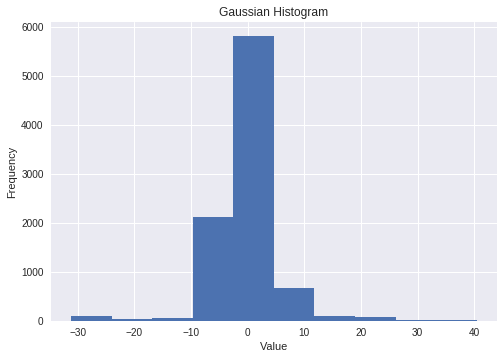

In [0]:
import matplotlib.pyplot as plt
import numpy as np
gaussian_numbers = y*180/3.14
plt.hist(gaussian_numbers)
plt.title("Gaussian Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")
fig = plt.gcf()
print(np.amax(y)*180/3.14)

40.430235668789805
done
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6


7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
3232


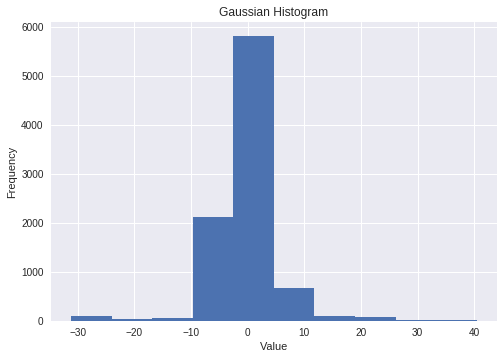

In [0]:
import matplotlib.pyplot as plt
import numpy as np
gaussian_numbers = y*180/3.14
plt.hist(gaussian_numbers)
plt.title("Gaussian Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")
fig = plt.gcf()
print(np.amax(y)*180/3.14)

ii=y.shape[0]
print("done")
cnt=0
cnt2=0
data_mod1=""
data_mod2=""
data_mod3=""
data_mod4=""
data_mod5=""
data_mod6=""
data_mod7=""
data_mod8=""
data_mod9=""
data_mod10=""
num_data_mod=0
for i in range (0,ii):
#   if i%100==0 :
#     print(i)
  if cnt<1000 and y[i,0]*180/3.14<=4 and y[i,0]*180/3.14>=-2:
    cnt=cnt+1
    list1=x[i,:,:,:].reshape(200*200*1)
    temp_str = ','.join(str(e) for e in list1)
    if num_data_mod<=555 :
      data_mod1 = data_mod1 + temp_str + ',' + str(y[i,0]) + '\n'
    elif num_data_mod<=555*2 :
      data_mod2 = data_mod2 + temp_str + ',' + str(y[i,0]) + '\n'
    elif num_data_mod<=555*3 :
      data_mod3 = data_mod3 + temp_str + ',' + str(y[i,0]) + '\n'
    elif num_data_mod<=555*4 :
      data_mod4 = data_mod4 + temp_str + ',' + str(y[i,0]) + '\n'
    elif num_data_mod<=555*5 :
      data_mod5 = data_mod5 + temp_str + ',' + str(y[i,0]) + '\n'
    elif num_data_mod<=555*6 :
      data_mod6 = data_mod6 + temp_str + ',' + str(y[i,0]) + '\n'
    elif num_data_mod<=555*7 :
      data_mod7 = data_mod7 + temp_str + ',' + str(y[i,0]) + '\n'
    elif num_data_mod<=555*8 :
      data_mod8 = data_mod8 + temp_str + ',' + str(y[i,0]) + '\n'
    elif num_data_mod<=555*9 :
      data_mod9 = data_mod9 + temp_str + ',' + str(y[i,0]) + '\n'
    else :
      data_mod10 = data_mod10 + temp_str + ',' + str(y[i,0]) + '\n'
    num_data_mod=num_data_mod+1
  elif y[i,0]*180/3.14<=4 and y[i,0]*180/3.14>=-2:
    continue
  elif cnt2<1000 and y[i,0]*180/3.14<=-2 and y[i,0]*180/3.14>=-10:
    cnt2=cnt2+1
    list1=x[i,:,:,:].reshape(200*200*1)
    temp_str = ','.join(str(e) for e in list1)
    if num_data_mod<=555 :
      data_mod1 = data_mod1 + temp_str + ',' + str(y[i,0]) + '\n'
    elif num_data_mod<=555*2 :
      data_mod2 = data_mod2 + temp_str + ',' + str(y[i,0]) + '\n'
    elif num_data_mod<=555*3 :
      data_mod3 = data_mod3 + temp_str + ',' + str(y[i,0]) + '\n'
    elif num_data_mod<=555*4 :
      data_mod4 = data_mod4 + temp_str + ',' + str(y[i,0]) + '\n'
    elif num_data_mod<=555*5 :
      data_mod5 = data_mod5 + temp_str + ',' + str(y[i,0]) + '\n'
    elif num_data_mod<=555*6 :
      data_mod6 = data_mod6 + temp_str + ',' + str(y[i,0]) + '\n'
    elif num_data_mod<=555*7 :
      data_mod7 = data_mod7 + temp_str + ',' + str(y[i,0]) + '\n'
    elif num_data_mod<=555*8 :
      data_mod8 = data_mod8 + temp_str + ',' + str(y[i,0]) + '\n'
    elif num_data_mod<=555*9 :
      data_mod9 = data_mod9 + temp_str + ',' + str(y[i,0]) + '\n'
    else :
      data_mod10 = data_mod10 + temp_str + ',' + str(y[i,0]) + '\n'
    num_data_mod=num_data_mod+1
  elif y[i,0]*180/3.14<=-2 and y[i,0]*180/3.14>=-10:
    continue
  else :
    list1=x[i,:,:,:].reshape(200*200*1)
    temp_str = ','.join(str(e) for e in list1)
    if num_data_mod<=555 :
      data_mod1 = data_mod1 + temp_str + ',' + str(y[i,0]) + '\n'
    elif num_data_mod<=555 :
      data_mod2 = data_mod2 + temp_str + ',' + str(y[i,0]) + '\n'
    elif num_data_mod<=555*2 :
      data_mod3 = data_mod3 + temp_str + ',' + str(y[i,0]) + '\n'
    elif num_data_mod<=555*3 :
      data_mod4 = data_mod4 + temp_str + ',' + str(y[i,0]) + '\n'
    elif num_data_mod<=555*4 :
      data_mod5 = data_mod5 + temp_str + ',' + str(y[i,0]) + '\n'
      print("5")
    elif num_data_mod<=555*5 :
      data_mod6 = data_mod6 + temp_str + ',' + str(y[i,0]) + '\n'
      print("6")
    elif num_data_mod<=555*6 :
      data_mod7 = data_mod7 + temp_str + ',' + str(y[i,0]) + '\n'
      print("7")
    elif num_data_mod<=555*7 :
      data_mod8 = data_mod8 + temp_str + ',' + str(y[i,0]) + '\n'
      print("8")
    elif num_data_mod<=555*8 :
      data_mod9 = data_mod9 + temp_str + ',' + str(y[i,0]) + '\n'
      print("9")
    else :
      data_mod10 = data_mod10 + temp_str + ',' + str(y[i,0]) + '\n'
      print("10")
    num_data_mod=num_data_mod+1
print(num_data_mod)

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Create & upload a text file.
out1 = drive.CreateFile({'title': 'data_mod1.txt'})
out1.SetContentString(data_mod1)
out1.Upload()

out2 = drive.CreateFile({'title': 'data_mod2.txt'})
out2.SetContentString(data_mod2)
out2.Upload()

out3 = drive.CreateFile({'title': 'data_mod3.txt'})
out3.SetContentString(data_mod3)
out3.Upload()

out4 = drive.CreateFile({'title': 'data_mod4.txt'})
out4.SetContentString(data_mod4)
out4.Upload()

out5 = drive.CreateFile({'title': 'data_mod5.txt'})
out5.SetContentString(data_mod5)
out5.Upload()
out6 = drive.CreateFile({'title': 'data_mod6.txt'})
out6.SetContentString(data_mod6)
out6.Upload()
out7 = drive.CreateFile({'title': 'data_mod7.txt'})
out7.SetContentString(data_mod7)
out7.Upload()
# out8 = drive.CreateFile({'title': 'data_mod8.txt'})
# out8.SetContentString(data_mod8)
# out8.Upload()
# out9 = drive.CreateFile({'title': 'data_mod9.txt'})
# out9.SetContentString(data_mod9)
# out9.Upload()
# out10 = drive.CreateFile({'title': 'data_mod10.txt'})
# out10.SetContentString(data_mod10)
# out10.Upload()

In [0]:
!pip install -U -q PyDrive
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file1 = drive.CreateFile({'id': '1zmBxn8ygJmHlocwXlqJkPFpo_HDAD6oM'})
file2 = drive.CreateFile({'id': '19mX4-LKu9lq_60-uahuszFJZ6B_cZSG1'})
file3 = drive.CreateFile({'id': '1MX_XLySW09HWCyYcf9X9nlTRHyJJp2J4'})
file4 = drive.CreateFile({'id': '1C1eiF4OR_51rrSdNKDG883fSYj742u4B'})
file5 = drive.CreateFile({'id': '1itJzo21Bq77DJhLOFc46UrGJ1FnFwKvQ'})
file6 = drive.CreateFile({'id': '1vxjiSOevFk13VjinEoOVnTs4dPxjo-VE'})
file7 = drive.CreateFile({'id': '1v9ZJlRmQ7z-0Vz6VmZD80AfKpEi1ciES'})

a1=file1.GetContentString()

In [0]:
# to know size of h
h=0
def compute_h(a):
  b=a.split('\n')
  for i in range(0,len(b)):
    if len(b[i])==0 :
      del b[i]
  return len(b)
h=h+compute_h(a1)
print(h)

5542


In [0]:
import numpy as np
import pylab as plt
x=np.zeros((h,200,200,1))
y=np.zeros((h,1))
ii=0
array = []

def putting_data_in_array(a):
  array = []
  b=a.split('\n')
  for i in range(0,len(b)):
    if len(b[i])==0 :
      del b[i]
  #print(len(b))
  for line in b: # read rest of lines
    array.append([float(x) for x in line.split(',')])
  return array

def assign_values_x_y(array,indx):
  global x
  global y
  for i in range(0+indx,len(array)+indx):
    a=array[i-indx][0:200*200]
    x[i,:,:,0]=np.reshape(a,(200,200))
    y[i][0]=array[i-indx][(200*200)]
  return len(array)


array=putting_data_in_array(a1)
a1=None
ii=ii+assign_values_x_y(array,ii)
array=[]
print(ii)

5542


11.615216560509554


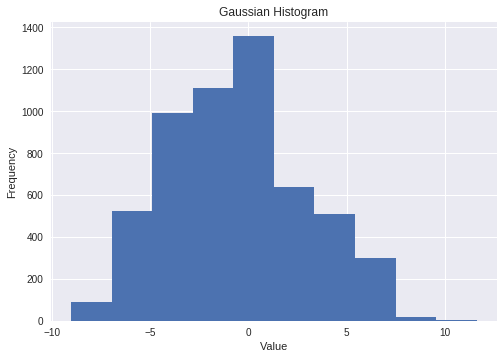

In [0]:
import matplotlib.pyplot as plt
import numpy as np
gaussian_numbers = y*180/3.14
plt.hist(gaussian_numbers)
plt.title("Gaussian Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")
fig = plt.gcf()
print(np.amax(y)*180/3.14)